<a href="https://colab.research.google.com/github/miloudbagaa/Embedded-Systems-Architecture/blob/master/FDQN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import random
import numpy as np
from uuid import uuid4
import math
class Task() :
    def __init__(self, task_sizes , arrival_time ) :
        self.max_deadline = 10  # the maximal deadline for tasks
        self.RES_PER_UNIT = 5 # constant that represents the amount of resources required per unit of task size
        self.size = np.random.choice(task_sizes)  #chooses a size from the passed set of sizes
        self.required_resources = self.size * self.RES_PER_UNIT # we suppose there's a linear relation between the size and the required resources
        self.start_processing_time = 0 # the instant of the start of the processing
        self.processing_time =  math.ceil(self.size * np.random.uniform(0.5, 1.5) ) # we suppose that the processing time is related to the task's size
        #self.ID = str(uuid4()) #generatae a unique id for each task
        self.waiting_time = 0 #if the waiting time > the deadline, then cancelled
        self.arrival_time = arrival_time # when the task was generated
        self.priority = np.random.randint(0, 1) # the priority is generated randomly between 0 and 1
        self.end_processing_time = 0
        self.deadline = self.max_deadline * (1 - self.priority) # the time that the task can wait before the task gets cancelled
        self.deadline += np.random.normal(loc=0, scale=0.5)  # adding some random noise to the deadline
        self.deadline = max(self.deadline, 0)   # # making sure the deadline is not negative

    def start_processing(self, start_processing_time , SIM_TIME ) : # called when the task is processed at instant start_processing_time
        self.start_processing_time = start_processing_time
        self.end_processing_time =  self.start_processing_time + self.processing_time
        if( self.end_processing_time >= SIM_TIME) :
          self.end_processing_time = SIM_TIME-1
    def to_float(self):
        return np.array([float(self.size), float(self.required_resources), float(self.start_processing_time),
                         float(self.processing_time), float(self.waiting_time), float(self.arrival_time),
                         float(self.priority), float(self.end_processing_time), float(self.deadline)])

In [ ]:

import numpy as np
class BS(object):
    def __init__(self, i_cell, j_cell, users_list, min_dis, max_dis , maxM , location , D_EDGE , Pe, Fe , SIM_TIME ):

        self.i_cell = i_cell
        self.j_cell = j_cell
        self.location = location
        self.users_list = users_list
        self.min_dis = min_dis
        self.max_dis = max_dis
        self.maxM= maxM
        self.D_EDGE = D_EDGE
        self.p_tx= 2*max_dis*j_cell + (i_cell%2)*max_dis
        self.p_ty= np.sqrt(3.)*max_dis*i_cell
        self.dis_r = np.random.uniform(min_dis, max_dis, size = maxM)
        self.phi_r = np.random.uniform(-np.pi, np.pi, size =  maxM)

        self.Fe= Fe # CPU frequency of the BS
        self.Pe = Pe # the power consumption of the BS per CPU cycle

        # Resources

        ''' self.resources_capacity = 4000
        self.resources_available =  np.full((SIM_TIME,), self.resources_capacity) # the amount of the resources of the BS
        self.resources_available_percentage = 100*self.resources_available/self.resources_capacity #current percentage of remaining resources

        '''

    def process_task(self, task , t ) :
        for i in range(t, task.end_processing_time):
            self.resources_available[i] -= task.required_resources





In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
dtype = float
power_num = 10  #action_num (dqn)
max_p = 23 #200 mW cellular IoT devices
minP=0
import math


class Device(object):
    def __init__(self, D_DEVICE, Pd , Fd,  SIM_TIME, bs , min_dis, max_dis , device_location , max_p, initial_power=0.1 , discharge_rate=5e-3 ): #5e-4
        self.SIM_TIME = SIM_TIME #simulation time
        #self.count = 0

        # Simulating the channel
        self.W = 1e5 # bandwidth
        self.sigma = -160 + 10*math.log10(self.W) #1e-3*pow(10., self.p_n/10.)
        self.sigma2 = self.sigma ** 2
        self.max_p_watt=  1e-3*pow(10,max_p/10)

        self.beta = 0.2 # 0.6 cost = (1-self.beta)*energy + self.beta*latency

        self.channel_gain_values = 1e5*np.array([ 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2 , 1.3,1.4, 1.5 ])  # array of channel gain values


        self.maximal_energy = 0
        self.maximal_latency = 0

        self.minimal_energy = 0
        self.minimal_latency = 0

        self.minimal_rate = 0
        self.maximal_rate = 0
        # Simulating battery levels

        # Set the battery parameters
        """ self.battery_capacity = 3600  # battery capacity (in coulombs)
        self.battery_energy = 129.6  # battery energy (in Wh)
        self.battery_voltage = 36  # battery voltage (in V)
        self.battery_current = np.zeros(len(SIM_TIME))  # battery current (in A)
        self.battery_charge = np.zeros(len(SIM_TIME))  # battery charge (in C)
    """


        self.initial_power = initial_power
        self.discharge_rate = discharge_rate
        self.battery_power = np.full(self.SIM_TIME, initial_power)
        self.battery_percentage = np.full(SIM_TIME, 100 )  # battery percentage (in %)

        self.discharge_battery() # discharge the battery constantly

        # Set the charging parameters
        self.charge_start_time = np.random.randint(0, self.SIM_TIME-1)  # randomly select the start time of charging
        #print('charge_start_time ' , self.charge_start_time)
        self.charge_end_time = np.random.randint(self.charge_start_time + 1, SIM_TIME)  # randomly select the end time of charging
        #print('self.charge_end_time ' , self.charge_end_time)
        self.charge_power = 0.08  # charging power (in W)

        # Set the task parameters

        # Distance and angle
        self.dis_r = np.random.uniform(min_dis, max_dis)
        self.phi_r = np.random.uniform(-np.pi, np.pi)
        self.p_rx =  bs.p_tx + self.dis_r*np.cos(self.phi_r)
        self.p_ry = bs.p_ty + self.dis_r*np.sin(self.phi_r)

        self.bs = bs
        self.x_device, self.y_device = device_location
        self.x_bs, self.y_bs = bs.location

        #simulate chaannel gain
        """ self.mean_db = -10  # mean value in dB
        self.std_db = 6  # standard deviation in dB
 """

        """ self.NS =1 # unit variance noise processes
        self.sigma_g = 1 # channel gain variance
        self.gamma = 2 # patNh loss factor
         """
        self.distance_device_edge = self.calulate_euclidean_distance()



        self.min_rate = 1#0
        self.max_rate = 10

        # Generate a random task arrival rate
        self.arrival_rate = np.random.uniform(self.min_rate, self.max_rate) #tasks arrival rate between 0 and 3
        #print('self.arrival_rate ', self.arrival_rate)
        self.tasks_arrival_number = self.gen_arrival_interval()
        #print('self.tasks_arrival_number ', self.tasks_arrival_number)
         #self.AVG_PROCESSING_TIME = AVG_PROCESSING_TIME


        #self.last_arrival_time = 0

        #self.electric_charge_per_byte = 1.602e-19 # Coulombs/byte
        #self.num_arrivals= 700                 #total number of arrival tasks
        #self.t_arrival=self.gen_arrival_interval()   #time of next arrival
        self.resources_capacity = 300 # the amount of the resources of the device
        self.remaining_resources = np.full((SIM_TIME,), self.resources_capacity) # the amount of the resources of the device
        self.remaining_resources_percentage = 100*self.remaining_resources/self.resources_capacity #current percentage of remaining resources
        #print('remaining_resources initiation ' , self.remaining_resources,'remaining_resources_percentage initiation ' , self.remaining_resources_percentage)
        #self.total_wait_time=0.0            #total wait time
        #self.num_in_q=0                     #current number in queue
        self.tasks_number_in_queue=0              #tasks that had to wait in line(counter)
        self.task_num_in_system=0                #current number of tasks in system
        self.task_sizes = [5, 10, 15, 20] #kbits



        self.D_DEVICE = D_DEVICE # a constant number of CPU cycles required to process one bit of the computation task
        self.Pd = Pd # the power consumption of the device per CPU cycle
        self.Fd = Fd #The CPU frequency of the IoT device


        self.lost_tasks=0               #tasks that havent been processed
        self.tasks_waiting_queue = []
        self.tasks_processed_queue = []
        self.queue_maximal_length = 10 #self.SIM_TIME*2  # Maximal length of task_queue



        self.max_p = max_p #max_p is used to define the levels of transmission powers
        self.maxP_edge = 1e-3*pow(10., self.max_p/10.) # maxP will be used later for the benchmarks (max_power and random_power)
        self.minP=0
        self.channel_gain = np.zeros(SIM_TIME)



    # Functions
    def calulate_euclidean_distance(self):
        return np.sqrt((self.x_device-self.x_bs)**2 + (self.y_device- self.y_bs)**2)


    def discharge_battery(self):
        for t in range(1, self.SIM_TIME ):
        # Compute battery power and percentage at time t
            #print('self.battery_power[t-1]  ini discharge_battery ' , self.battery_power[t-1] )
            self.battery_power[t] = self.battery_power[t-1] - self.discharge_rate
            #print('self.battery_power[t] in discharge_battery after substraction ', self.battery_power[t])
            if(self.battery_power[t] < 0 ) :
              #print('self.battery_power[t] < 0  discharge_battery')
              self.battery_power[t]  = 0
            self.battery_percentage[t] = np.round( 100*self.battery_power[t] / self.initial_power/5)*5
        #print('battery_power in discharge_battery ' , self.battery_power)

    def gen_arrival_interval(self) : # a function that generates arrival time using inverse transform
        #return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * self.arrival_rate)
        interarrival_times = np.random.exponential(1 / self.arrival_rate, size=int(self.arrival_rate * self.SIM_TIME ))
        arrival_times = np.cumsum(interarrival_times)
        task_counts = []
        for i in range( self.SIM_TIME):
            num_arrivals = np.sum(np.logical_and(arrival_times >= i, arrival_times < i + 1))
            task_counts.append(num_arrivals)
        return np.array(task_counts)

    """ def gen_processing_time(self):                                #function that generates processing time for the device using inverse trnasform
        return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * self.AVG_PROCESSING_TIME)
    """
    """ def task_arrival(self , task) : # a task has been generated and stored in the tasks queue
        self.num_in_q += 1 #increment the number of tasks in the queue
        self.task_num_in_system += 1 #increment the number of tasks

        #to store the task in the queue
        self.tasks_waiting_queue.append(task)  """


    def charge_battery(self , count): # called in the loop to check for every instant if its the charging time
        # Simulate random charging of battery
        #print('inside charge_battery self.charge_start_time = ', self.charge_start_time ," count ", count, " self.charge_end_time " , self.charge_end_time)
        if self.charge_start_time <= count < self.charge_end_time: #the battery is charging
                #print('self.charge_start_time <= count < self.charge_end_time')
                #print('self.battery_power[count] before the charging ' , self.battery_power[count])
                self.battery_power[count] += self.charge_power
                #print('self.battery_power[count] after the charging ' , self.battery_power[count])
                if self.battery_power[count] > self.initial_power:
                    #print("self.battery_power[count] > self.initial_power ")
                    self.battery_power[count] = self.initial_power
                self.battery_percentage[count] = (self.battery_power[count] / self.initial_power) * 100
                #print('self.battery_percentage[count]  ' ,self.battery_percentage[count] )

    def process( self, i , task ) : #called in case the agent chooses to process the task locally
        penalty = 0
        resources_penalty_factor = 1.5 #1.5
        battery_penalty_factor = 2#2
        MAX_RESOURCE_VIOLATION_VALUE = 200
        MAX_BATTERY_VIOLATION_VALUE = 100
        #print('inside process locally remaining_resources ' , self.remaining_resources)
        #print("i = " , i , 'self.remaining_resources[i] ' , self.remaining_resources[i], " task.required_resources = " , task.required_resources , " self.battery_percentage[i] = " , self.battery_percentage[i] , "  task.size * self.D_DEVICE * self.Pd) " ,  task.size * self.D_DEVICE * self.Pd)
        # check whether the remaining resources in the device are sufficient for the rocessing of the task locally
        if (self.remaining_resources[i] >= task.required_resources )& (self.battery_power[i] >= task.size * self.D_DEVICE * self.Pd) : #  + self.discharge_rate*task.processing_time if enought resources and battery
            #print('self.remaining_resources[i] > task.required_resources )& (self.battery_percentage[i] > task.size * self.D_DEVICE * self.Pd')
            task.start_processing(i , self.SIM_TIME ) # i is the index of the loop
            #print('task.end_processing_time ' , task.end_processing_time)
            #print('before allocating resources self.remaining_resources ' , self.remaining_resources)
            for j in range(i, task.end_processing_time+1): # substract the required resources until the task is finished
                #print(' j = ' , j , "self.remaining_resources[j] " , self.remaining_resources[j])
                self.remaining_resources[j] -= task.required_resources
                self.remaining_resources_percentage[j] = np.round( 100*self.remaining_resources[j]/self.resources_capacity/2)*2
                #print(' j = ' , j , "self.remaining_resources[j] " , self.remaining_resources[j] , " self.remaining_resources_percentage[j] " , self.remaining_resources_percentage[j])



            self.tasks_processed_queue.append(task) # add the task to the list of the tasks that are being processed by the device
            #print('self.tasks_processed_queue ' , self.tasks_processed_queue)
            # we suppose thatt the tasks size is in bytes
            task_power = task.size * self.D_DEVICE * self.Pd   # Power needed by the device to process the task
            #print('task_power ', task_power)
            #print('before substracting power self.battery_power[t] = ' , self.battery_power , "and self.battery_power[t] = " , self.battery_power[i])
            for t in range(i ,self.SIM_TIME) :
              self.battery_power[t] -= task_power  # substract the needed power from the battery
              if( self.battery_power[t] < 0 ) :
                #print('self.battery_power[t] < 0  ')
                self.battery_power[t] = 0

              self.battery_percentage[t] = np.round( 100*self.battery_power[t]/self.initial_power/5) * 5

              #print('t = ' , t , ' self.battery_power[t] = ' , self.battery_power[t])

            # after the processing is finished
            #self.tasks_waiting_queue.remove(task)
        else : # if the resources are not enough for the calulculation
            #print('resources not enough for the calculation')
            if (self.remaining_resources[i] < task.required_resources ) : # if insufficient resources
                #print("self.remaining_resources[i] < task.required_resources ")
                # if self.remaining_resources[i] != 0:
                #     resources_violation =( task.required_resources - self.remaining_resources[i]) / float(self.remaining_resources[i])
                # else:
                #     resources_violation = MAX_RESOURCE_VIOLATION_VALUE  # Assign a large value to indicate a significant violation


                #normalized resources_violation
                resources_violation =( task.required_resources - self.remaining_resources[i]) / (np.amax(self.task_sizes) * task.RES_PER_UNIT)
                penalty = resources_penalty_factor * resources_violation # add a penalty proportionate to the violation of the resources
                #print(' violation = ' , task.required_resources - self.remaining_resources[i], " resources_violation ", resources_violation, "penalty " ,penalty)
            if (self.battery_power[i] < task.size * self.D_DEVICE * self.Pd ) : # + self.discharge_rate*task.processing_time  , if insufficient battery
                #print('self.battery_power[i] < task.size * self.D_DEVICE * self.Pd')
                ''' if self.battery_power[i] != 0:
                    battery_violation = (task.size * self.D_DEVICE * self.Pd - self.battery_power[i]) / self.battery_power[i]
                else :
                    battery_violation = MAX_BATTERY_VIOLATION_VALUE '''

                # normalized battery_violation
                battery_violation = (task.size * self.D_DEVICE * self.Pd - self.battery_power[i]) / (np.amax(self.task_sizes) * self.D_DEVICE * self.Pd)

                penalty = battery_penalty_factor * battery_violation
                #print(' battery_violation ' , battery_violation , " penalty ", penalty)

            if (i >  task.arrival_time + task.deadline) : # if the deadline is not over
                    #print('i >  task.arrival_time + task.deadline (deadline is not over )')
                    #self.tasks_waiting_queue.remove(task) # add the task to the end of the queue
                    self.tasks_waiting_queue.append(task)
                    #print('after appending the task again to tasks_waiting_queue ' , self.tasks_waiting_queue)
            # else: # the deadline is over
            #     #print('deadline is over')
            #     self.tasks_waiting_queue.remove(task)
        return penalty


    def offload_edge(self , task , i , P):
        battery_penalty_factor = 2  # no offloading = no latency
        penalty = 0
        if (self.battery_power[i] < P ) : # + self.discharge_rate*task.processing_time , if insufficient battery for allocating the transmit power
            #battery_violation = P - self.battery_power[i]
            battery_violation = (P - self.battery_power[i])/ self.max_p_watt
            penalty = battery_penalty_factor * battery_violation
            if (i >  task.arrival_time + task.deadline) : # if the deadline is not over
                #self.tasks_waiting_queue.remove(task)
                self.tasks_waiting_queue.append(task)
            # else : #the deadline is over
            #     self.tasks_waiting_queue.remove(task)
        else:

            for t in range(i , self.SIM_TIME) :
              self.battery_power[t] -= P  # substract the needed power from the battery
              if(self.battery_power[t] < 0 ) :
                #print('self.battery_power[t] < 0')
                self.battery_power[t] = 0
              self.battery_percentage[t] = np.round( 100*self.battery_power[t]/self.initial_power/5) * 5

        return penalty



        #this function is called every instant t ( every second maybe)
    def cancel(self , i):  # we can add it to further change the state of the task queue
        for task in self.tasks_waiting_queue :
            if (i >  task.arrival_time + task.deadline) :
                #delete the task from the queue, increase the number of cancelled tasks
                self.tasks_waiting_queue.remove(task)
                self.lost_tasks += 1

    """ def update_remaining_resources(self):
        self.remaining_resources_percentage =  #current percentage of remaining resources
 """
    #TODO : check issue with count +1 (ending task before time?)
    #to liberate the resources once the task is completed
    """ def liberate_resources(self, i) :  #called for each instant i (in a for loop during the simulation)
        for task in self.tasks_processed_queue :
            if task.end_processing_time == i: #if the current instant i correxponds to the task's time of end of processing
                for j in range(i , self.SIM_TIME):
                    self.remaining_resources[j] += task.required_resources # add the resources reserved by the task
                    self.update_remaining_resources()
                    self.tasks_processed_queue.remove(task) """

    def update_task_queue(self, t) : # called at the beginning of every time slot
        """ if t - self.last_arrival_time >= self.gen_arrival_interval():
            task = Task(self.task_sizes, t)
            self.tasks_waiting_queue.append(task)
            self.last_arrival_time = t """
        tasks_num = self.tasks_arrival_number[t] # number of tasks that come at instant t
        for i in range(tasks_num): # generate tasks_num tasks
            task = Task(self.task_sizes, t)
            self.tasks_waiting_queue.append(task)

        self.cancel( t)
        if(self.tasks_waiting_queue):
            self.tasks_waiting_queue.pop(0)





    """ def predict_remaining_resources_edge( i ) :  # returns the percentage of remaining resources in the edge
        time_step = 0.1
        t = time_step * i
        return 100*np.exp(-0.01*t) """


#dynamicaly calculate the weighting factor according to the tasks priority and the remaining battery
    def calculate_beta(self , task, theta, remaining_battery):
        beta = theta * task.priority + (1 - theta) * remaining_battery
        return beta


    def generate_channel_gain(self): # TODO: #16 change the generation of channel gain
        # Convert mean and standard deviation to linear scale (parameters of the Rayleigh fading model)
        """ mean = 10**(self.mean_db/10)
        std = 10**(self.std_db/10)

        # Generate random samples from the Rayleigh distribution
        h = np.random.normal(loc=mean, scale=std, size=self.SIM_TIME)
        self.channel_gain = np.abs(h)**2  # take the magnitude squared to get the channel gain
 """

        # generate channel gain
        """ hij = np.random.normal(0, self.sigma_g**0.5 , size= self.SIM_TIME) * ((1 + self.distance_device_edge)**(-self.gamma/2))
        gij = hij**2 / self.NS # assuming unit variance noise processes
        self.channel_gain = gij """
        for i in range(self.SIM_TIME):
            self.channel_gain[i] = np.random.choice(self.channel_gain_values)





    def generate_next_state(self, count): # count here is already incremented
        '''

        Generate state for actor
        state including:
        1. the channel gain
        2. the queue state of the device
        3. the edge_workload_expectation
        4. the remaining_resources of the device
        5. the battery_level of the device
        '''


        if (count <= self.SIM_TIME-1 ) : # if we haven't reached the end of the simulation time yet
            channel_gain = self.channel_gain[count]
            # update the task qeueue
            self.update_task_queue(count) #update the waiting queue
            # liberate the resources my_array = numpy.array(my_array.tolist())

            task_queue_array = self.queue_to_float()

            #edge_workload_expectation = self.predict_remaining_resources_edge(count+1)
            remaining_resources = self.remaining_resources_percentage[count]
            #constant discharging
            battery_percentage = self.battery_percentage[count]


            ###print(" generate state task_queue_array.flatten() " , task_queue_array.flatten())
            state_array = np.concatenate(([battery_percentage, remaining_resources, channel_gain], task_queue_array.flatten()))
            ##print("generate state state_array " , state_array)
            # convert the array to a tensor
            #state_tensor = torch.tensor(state_array, dtype=torch.float)
            ##print("state_tensor " , state_tensor)



            '''
            state = T.tensor([observation],dtype=T.float).to(self.q_eval.device)
            actions = self.q_eval.forward(state) '''

            '''  task_queue_tensor = torch.tensor(task_queue_array, dtype=torch.float32).to(self.q_eval.device)
            battery_level_tensor = torch.tensor([battery_percentage] , dtype=torch.float32).to(self.q_eval.device)
            resources_tensor = torch.tensor([remaining_resources] , dtype=torch.float32).to(self.q_eval.device)
            channel_gain_tensor = torch.tensor([channel_gain], dtype=torch.float32).to(self.q_eval.device)

            # concatenate tensors
            state_tensor = torch.cat([task_queue_tensor.view(-1), battery_level_tensor, resources_tensor, channel_gain_tensor]).to(self.q_eval.device)
            '''
            # convert concatenated tensor to list
            #state_list =  state_tensor#state_tensor.tolist()



            s_actor_next = state_array #np.hstack([channel_gain , task_queue_array , remaining_resources, battery_percentage ])



            s_critic_next = state_array #np.hstack([channel_gain , task_queue_array , remaining_resources, battery_percentage ])
            #print(' s_actor_next ' , s_actor_next , " s_critic_next ", s_critic_next)
            return s_actor_next, s_critic_next

    def queue_to_float(self):
        task_queue = []
        if(self.tasks_waiting_queue):
          for h in range(len(self.tasks_waiting_queue)) :
              task_queue.append(self.tasks_waiting_queue[h].to_float())

          ##print("task_queue after h loop ", task_queue )
          ##print('task_queue length' , len(task_queue))



          if len(task_queue) < self.queue_maximal_length:
              ##print("inside if ")
                  # Add zeroes to the task_queue to make it the same length as self.queue_maximal_length
              ra = self.queue_maximal_length - len(task_queue)
              ##print("raaaaaange " , ra)
              ##print(self.queue_maximal_length - len(task_queue))
              new_arrays = [np.zeros(9 , dtype=float) for _ in range(ra)]
              ##print("new_arrays ", new_arrays)
              task_queue = np.vstack((task_queue,) + tuple(new_arrays))
              ##print("task_queue after the concat ", task_queue )
              #task_queue += [0] * (self.queue_maximal_length - len(task_queue))
          elif len(task_queue) > self.queue_maximal_length:
              # Remove additional elements from task_queue
              task_queue = task_queue[:self.queue_maximal_length]
        else : # empty queue fill it with it a tuple of zeroes and add max_length -1
          new_arrays = [np.zeros(9 , dtype=float) for _ in range(self.queue_maximal_length)]
          ##print("new_arrays empty ", new_arrays)
          task_queue = np.vstack(tuple(new_arrays))
          ##print("task_queue after the concat emptyy", task_queue )



        # Convert task_queue to a numpy array
        task_queue = np.array(task_queue)
        #task_queue_array = task_queue.astype(float32)

        ##print("task_queue after ", task_queue)
        ##print("task_queue_array" , task_queue_array)



        return task_queue #task_queue_array

    def calculate_rate(self, P , count):
        channel_gain = self.channel_gain[count]

        """
        :param P: Transmit power at the edge device.
        :param channel_gain: Channel gain between the edge device and the base station.
        :param sigma: Noise power.

        :param W: Available bandwidth for the edge device.
        :return: Achievable rate for the edge device.
        """

        #print("P_power " , P)

        snr = (P * channel_gain) / self.sigma2
        #print('snr ' , snr )
        #print( "np.log2(1 + snr)" , np.log2(1 + snr))
        rate= self.W * np.log2(1 + snr)
        #self.maximal_rate = self.W * np.log2(1 + np.min(self.max_p_watt * self.channel_gain_values) / self.sigma2)

        self.minimal_rate = self.W * np.log2(1 + 0.5*self.max_p_watt * np.min(self.channel_gain_values) / self.sigma2)

        #print("rate " , rate)
        return rate

    def calculate_reward(self, mode, P , count, task , penalty ): # TODO: return the latency, the energy too to plot them later

        #calculate the rate
        rate = self.calculate_rate( P , count)
        #print('rate ' , rate)
        #calculate latency
        latency = self.calculate_latency( rate, mode, task)
        normalized_latency = latency/self.maximal_latency
        #print('latency before normalization' , latency , "latency after normalization" , normalized_latency)
        #calculate energy
        energy = self.calculate_energy( mode, task )
        ##print("mode ", mode, "energy " , energy , "latency " , latency)
        normalized_energy = energy/self.maximal_energy
        #print('energy before normalization' , energy , "energy after normalization" , normalized_energy)

        # calculate cost
        cost = (1-self.beta)*normalized_energy + self.beta*normalized_latency
        #print('cost ' , cost)
        #calculate the reward
        reward = - cost - penalty
        #print("penalty " , penalty)
        #print('reward ' , reward)
        return reward , normalized_energy, normalized_latency

    def calculate_latency( self, rate, mode, task):
        if (mode == 0 ): #local computing
            #print('mode =0 calculate_latency ')
            latency = (self.D_DEVICE*task.size)/self.Fd
            self.maximal_latency = (self.D_DEVICE * np.amax(self.task_sizes))/self.Fd
            #self.minimal_latency = (self.D_DEVICE*np.min(self.task_sizes))/self.Fd
            #print('(self.D_DEVICE ' ,  self.D_DEVICE , 'np.amax(self.task_sizes)) ' , np.amax(self.task_sizes), 'self.Fd ' , self.Fd)
            #print(' local task.size ' , task.size, ' latency' , latency ,  " maximal_latency" , self.maximal_latency)

        else : #edge computing
            ##print('mode <> 0 calculate_latency ')
            ##print('self.D_DEVICE ', self.D_DEVIC= E)
            ##print('task.size ', task.size)
            ##print('self.bs.Fe ', self.bs.Fe)
            computing_latency = (self.D_DEVICE*task.size)/self.bs.Fe
            transmission_latency = (task.size)/rate
            latency = computing_latency + transmission_latency

            self.maximal_latency =  (self.D_DEVICE*np.amax(self.task_sizes))/self.bs.Fe + np.amax(self.task_sizes) / self.minimal_rate
            #print('(self.D_DEVICE ' ,  self.D_DEVICE , 'np.amax(self.task_sizes)) ' , np.amax(self.task_sizes), 'self.bs.Fe' , self.bs.Fe , "self.minimal_rate " , self.minimal_rate )
            #self.minimal_latency =  (self.D_DEVICE*np.min(self.task_sizes))/self.bs.Fe + np.min(self.task_sizes) / self.maximal_rate
            #print(' offload task.size ' , task.size, ' latency' , latency ,  " maximal_latency" , self.maximal_latency)

            ##print('latency ' , latency)

        return latency


    def calculate_energy( self, mode, task):
        if (mode == 0) : #local computing
            #print('mode =0 calculate_energy ')
            energy = self.D_DEVICE* task.size *self.Pd
            #print(' task.size ' , task.size, ' energy' , energy ,  " maximal_energy" , self.maximal_energy)
            self.maximal_energy = self.D_DEVICE*np.amax(self.task_sizes)*self.Pd
            #print(' task.size ' , task.size, ' energy' , energy ,  " maximal_energy" , self.maximal_energy)
        else : #edge computing
            ##print('mode <> 0 calculate_energy ')
            # #print(' self.bs.D_EDGE ',  self.bs.D_EDGE)
            # #print(' task.size ' , task.size)
            # #print('self.bs.Pe ',self.bs.Pe )
            energy = self.bs.D_EDGE*task.size*self.bs.Pe
            self.maximal_energy = self.bs.D_EDGE * np.amax(self.task_sizes)*self.bs.Pe
            #print(' task.size ' , task.size, ' energy' , energy ,  " maximal_energy" , self.maximal_energy)
        ##print('energy ' , energy)
        return energy

    def step(self, P , count , task): # take a step in the env
        # edge_remaining_res_expect = self.edge_remaining_res_expect
        threashold =self.max_p_watt/2 # the power allocation threshold below which you consider the task as processed locally
        #print('threashhold step ' , threashold)
        if(P < threashold ): # TODO check this, with the count, the waiting list
            ##print('step P = 0')
            mode = 0  # local computation
            #print('mode = ' , mode)
            penalty = self.process( count , task )
            #print('penalty local ' , penalty)
        else:
            ##print('step P <> 0')
            mode = 1 # offloading
            ##print('mode = ' , mode)
            penalty = self.offload_edge(  task , count , P  )
            #print('penalty offloading ' , penalty)


        reward , energy, latency = self.calculate_reward( mode, P , count, task , penalty )
        #print('reward' , reward)

        s_actor_next , s_critic_next = self.generate_next_state(count + 1)
        #print(' inside step s_actor_next ' , s_actor_next , 's_critic_next ' , s_critic_next ,' reward' , reward, ' energy' , energy,' latency' , latency)


        return s_actor_next ,s_critic_next , reward , energy, latency , penalty

    def step__(self, P, count, task): # caled for the benchmarks
        threashold = self.max_p_watt/2
        if (P < threashold ) :
            mode = 0
            penalty = self.process(count, task)
            #print('penalty local ' , penalty)
        else :
            mode = 1 #offloading
            penalty = self.offload_edge(task , count , P)
            #print('penalty offloading ' , penalty)
        reward , energy, latency = self.calculate_reward( mode, P, count, task , penalty)
        self.update_task_queue(count + 1 )

        # next_state = self.generate_next_state(count + 1)
        return reward , energy, latency , penalty #, next_state

    def get_power_set(self): # the power levels range from 0 to max_p
        power_edge_set = np.hstack([np.zeros((1), dtype=dtype), 1e-3*pow(10.,
                                    np.linspace(0, self.max_p, power_num-1)/10.)])
        return power_edge_set

    # Rest the device

    def reset(self):
        #self.count = 0    # set count to 0
        self.tasks_waiting_queue.clear()  # clear the waiting queue
        first_task = Task(self.task_sizes, 0) # first task generated so that the queue wont be totally empty
        self.tasks_waiting_queue.append(first_task)
        for i in range(self.SIM_TIME) :  # set the remaining resources to the maximal capacity
            self.remaining_resources[i] = self.resources_capacity
            self.remaining_resources_percentage[i] = 100

            self.battery_power = np.full(self.SIM_TIME, self.initial_power)
            self.battery_percentage = np.full(self.SIM_TIME, 100 )  # battery percentage (in %)
        self.discharge_battery() # discharge the battery constantly

        # Set the charging parameters
        self.charge_start_time = np.random.randint(0, self.SIM_TIME -1)  # randomly select the start time of charging
        self.charge_end_time = np.random.randint(self.charge_start_time + 1, self.SIM_TIME)  # randomly select the end time of charging


        self.generate_channel_gain() #initialize the channel gain array
        channel_gain = self.channel_gain[0].astype(float)

        task_queue_array = self.queue_to_float()

        remaining_resources = self.remaining_resources_percentage[0].astype(float)
        battery_percentage = self.battery_percentage[0].astype(float)
        #print("**********************************************")


        ##print('remaining_resources before tensor ' , remaining_resources)
        ##print('channel_gain before tensor ' , channel_gain)
        #print('task_queue_array before tensor ' , task_queue_array)
        ##print('battery_percentage before tensor ' , battery_percentage)


        '''  task_queue_tensor = torch.tensor(task_queue_array , dtype=torch.float) # .to(self.q_eval.device)
        battery_level_tensor = torch.tensor([battery_percentage] , dtype=torch.float) # .to(self.q_eval.device)
        resources_tensor = torch.tensor([remaining_resources] , dtype=torch.float) # .to(self.q_eval.device)
        channel_gain_tensor = torch.tensor([channel_gain] , dtype=torch.float) # .to(self.q_eval.device)
        '''
        ##print('resources_tensor after tensor ' , resources_tensor)
        ##print('channel_gain_tensor after tensor ' , channel_gain_tensor)
        ''' #print('task_queue_tensor after tensor ' , task_queue_tensor)
        #print('task_queue_tensor after tensor view ' , task_queue_tensor.view(-1),)  '''
        ##print('battery_level_tensor after tensor ' , battery_level_tensor)

        # create a NumPy array by concatenating the given floats and task_queue
        ##print("task_queue_array.flatten() " , task_queue_array.flatten())
        state_array = np.concatenate(([battery_percentage, remaining_resources, channel_gain], task_queue_array.flatten()))
        ##print("state_array " , state_array)
        # convert the array to a tensor
        #state_tensor = torch.tensor(state_array, dtype=torch.float)
        ##print("state_tensor " , state_tensor)




        # concatenate tensors
        #state_tensor = torch.cat([task_queue_tensor.view(-1), battery_level_tensor, resources_tensor, channel_gain_tensor]).to(self.q_eval.device)

        # convert concatenated tensor to list
        #state_list = state_tensor#state_tensor.tolist()



        s_actor = state_array #np.hstack([channel_gain , task_queue_array , remaining_resources, battery_percentage ])



        s_critic = state_array #np.hstack([channel_gain , task_queue_array , remaining_resources, battery_percentage ])


        #s_actor = np.hstack([channel_gain , task_queue_array , remaining_resources, battery_percentage ])
        #s_critic= np.hstack([channel_gain , task_queue_array , remaining_resources, battery_percentage ])

        return s_actor, s_critic

    def reset__(self):
        #self.count=0
        self.tasks_waiting_queue.clear()  # clear the waiting queue
        first_task = Task(self.task_sizes, 0) # first task generated so that the queue wont be totally empty
        self.tasks_waiting_queue.append(first_task)
        for i in range(self.SIM_TIME ) :  # set the remaining resources to the maximal capacity
            self.remaining_resources[i] = self.resources_capacity
            self.remaining_resources_percentage[i] = 100

            self.battery_power = np.full(self.SIM_TIME, self.initial_power)
            self.battery_percentage = np.full(self.SIM_TIME, 100 )  # battery percentage (in %)
             # discharge the battery constantly

            # Set the charging parameters
            self.charge_start_time = np.random.randint(0, self.SIM_TIME -1)  # randomly select the start time of charging
            self.charge_end_time = np.random.randint(0, self.SIM_TIME -1)  # randomly select the end time of charging
        self.discharge_battery()
        self.generate_channel_gain() #initialize the channel gain array

In [ ]:
# This file contains the DQN Model
#
import torch as T
import torch.nn as nn
import torch.optim as optim #for the optimization algorithms.
import torch.nn.functional as F #contains convolutional, pooling, linear, dropout, sparse, loss, and non-linear activation functions

# lr: learning rate
# n_actions : number of actions (the last layer of the model has n_actions outputs)
# chkpt_d, checkpoint_dir : the directory where we keep the saved models (/models)
# fc1, fc2 , fc3 : fully-connected layers 1, 2 ,3
class DQNetwork(nn.Module):
    def __init__(self, lr, n_actions, state_size, chkpt_dir):
        super(DQNetwork, self).__init__()

        self.checkpoint_dir = chkpt_dir
        self.checkpoint_file = self.checkpoint_dir+'/models'
        self.fc1 = nn.Linear(state_size, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, n_actions)

        ''' self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 64)
        #self.fc3 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, n_actions) '''

        self.optimizer = optim.Adam(self.parameters(), lr=lr) #we use the Adam optimizer ( it takes params and learning rate)
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu') # check whether or not cuda is available
        self.loss = nn.MSELoss() # the loss function measures the mean squared error (squared L2 norm) between each element in the input x and target y
        self.to(self.device)


    def forward(self, state):
        # the relu activation function applies the rectified linear unit function element-wise
        x = F.relu(self.fc1(state))
        #print(' x in forward ' , x)
        x = F.relu(self.fc2(x))
        #print(' x 2 in forward ' , x)
        x = F.relu(self.fc3(x))
        actions = F.relu(self.fc4(x))
        #actions = F.relu(self.fc3(x))
        #print(' actions in forward ' , actions)

        return actions

    def save_checkpoint(self,save_file):
        print('... saving checkpoint ...')
        # A state_dict is a Python dictionary object that maps each layer to its parameter tensor
        T.save(self.state_dict(), save_file)

    def load_checkpoint(self,load_file):
        print('... loading checkpoint ...')
        self.load_state_dict(T.load(load_file))


In [ ]:


class DQNAgent(object):
    def __init__(self,gamma, lr, n_actions, state_size,
                 buffer_size, batch_size, INITIAL_EPSILON, FINAL_EPSILON,max_episode,
                 replace=1000,chkpt_dir='tmp/dqn'):
        self.gamma = gamma #the discount factor is used to determine the importance of future rewards
        self.lr = lr #the learning rate for the agent
        self.epsilon = INITIAL_EPSILON # the value of the initial exploration rate for the agent
        self.n_actions = n_actions
        self.state_size = state_size
        self.batch_size = batch_size
        self.INITIAL_EPSILON = INITIAL_EPSILON
        self.FINAL_EPSILON = FINAL_EPSILON
        self.max_episode=max_episode
        self.replace_target_cnt = replace #This sets the number of episodes after which the target network will be replaced with the evaluation network
        self.chkpt_dir = chkpt_dir #This sets the directory where the agent's checkpoints will be saved
        self.action_space = [i for i in range(n_actions)] #This creates a list of all possible actions the agent can take
        self.learn_step_counter = 0 # This sets the number of learning steps taken by the agent.
        self.memory =ReplayBuffer(buffer_size) #this creates a ReplayBuffer object that will store the agent's experiences

        self.q_eval = DQNetwork(self.lr, self.n_actions, #This creates the evaluation neural network.
                                    state_size=self.state_size,
                                    chkpt_dir=self.chkpt_dir)

        self.q_next = DQNetwork(self.lr, self.n_actions, # This creates the target neural network.
                                    state_size=self.state_size,
                                    chkpt_dir=self.chkpt_dir)

        self.q_next.load_state_dict(self.q_eval.state_dict()) #This sets the weights of the target network to be the same as the evaluation network
        self.tau=0.001 # This sets the value of tau which is used to update the target network's weights
        """
        self.power_edge = power_edge
        self.power_cloud = power_cloud

        """
    def choose_action(self, observation): #This function is used to choose an action for the agent to take based on its current state.
        if np.random.random() > self.epsilon: # if the random number > epsilon then exploitation, else exploration
            state = T.tensor([observation],dtype=T.float).to(self.q_eval.device)   # Convert the observation to a PyTorch tensor and move it to the GPU (if available)
            actions = self.q_eval.forward(state) # Use the Q evaluation network to get the Q values for each action
            #print('actions choose actions ' , actions)
            action = T.argmax(T.squeeze(actions), dim=1).detach().numpy()  # to choose the action with the highest Q value
            #print("action choose actions" , action)
        else: # With probability epsilon, choose a random action (exploration)
            action = np.random.choice(self.action_space)

        return action
        #to store te transition
    def store_transition(self, state, action, reward, state_):
        #self.memory.store_transition(state, action, reward, state_, done)
        self.memory.add(state, action, reward, state_)
    #sample_memory
    def sample_memory(self): # returns a batch of experiences from the replay memory
        #print("insiiide sample_memory")
        state, action, reward, new_state = self.memory.sample_batch(self.batch_size)
        #print('state ', state, "action ", action, "reward ", reward , "new_state" , new_state)
        #states = T.tensor(state,dtype=T.float32).to(self.q_eval.device)
        #rewards = T.tensor(reward,dtype=T.float32).to(self.q_eval.device)
        #actions = T.tensor(action).to(self.q_eval.device)
        #states_ = T.tensor(new_state,dtype=T.float32).to(self.q_eval.device)

        states = T.tensor(state,dtype=T.float).to(self.q_eval.device)
        #reward = np.nan_to_num(reward).astype(np.float)
        rewards = T.tensor(reward,dtype=T.float).to(self.q_eval.device)
        actions = T.tensor(action).to(self.q_eval.device)
        states_ = T.tensor(new_state,dtype=T.float).to(self.q_eval.device)

        #print('states ', states, "actions ", actions, "rewards ", rewards , "states_" , states_)


        return states, actions, rewards, states_

    #to update the target network
    def replace_target_network(self):
        if self.learn_step_counter % self.replace_target_cnt == 0: # If the number of learning steps is divisible by the target network replacement frequency:
            self.q_next.load_state_dict(self.q_eval.state_dict()) # Copy the weights from the evaluation network to the target network
    #to update epsilon
    def decrement_epsilon(self,episode): #to decrease the value of epsilon for epsilon-greedy exploration over time as the number of episodes increases
        self.epsilon = self.INITIAL_EPSILON - episode * (self.INITIAL_EPSILON - self.FINAL_EPSILON) / self.max_episode
    #to save the model
    def save_models(self,save_file):
        self.q_eval.save_checkpoint(save_file)

    # to load the models
    def load_models(self,load_file): # to load the model
        self.q_eval.load_checkpoint(load_file)

    def learn(self): #where the learning happens

        self.q_eval.optimizer.zero_grad() # Reset the gradients for the optimizer
        states, actions, rewards, states_  = self.sample_memory()  # Sample a batch of transitions from the replay buffer
        #print("learn states ", states)
        #print( "learn actions" , actions )
        #print( "learn reward ", rewards)
        #print(" learn states ", states_)


        #print("states shape in learn " , states.shape[0])

        batch_size = min(self.batch_size , states.shape[0] )  # Determine the size of the batch to be used for training the network
        indices = np.arange(batch_size)  # Create an array of indices


        #print('indices ', indices)

        q_pred = self.q_eval.forward(states)[indices, actions.squeeze()]  # Use the evaluation network to predict Q-values for the current states and actions in the batch
        #print("q_pred " , q_pred)
        ##print('q_pred shape 0', q_pred.shape[0], 'q_pred shape 1' ,  q_pred.shape[1] )
        ###print('q_next' , q_next)
        q_next = self.q_next.forward(states_).max(dim=1)[0]   # Use the target network to predict the maximum Q-value for the next states in the batch


        #q_next = self.q_next.forward(states_)
        #print("q_next shape " , q_next.shape[0])

        #max_actions = T.argmax(q_next, dim=1)
        ##print("max_actions shape " , max_actions.shape[0])

        #q_target = rewards + self.gamma*q_next[indices, max_actions]

        q_target = rewards + self.gamma*q_next  # Calculate the target Q-values using the Bellman equation
        ##print("q_pred " , q_pred)
        #print("rewards ", rewards)
        ''' #print('q_next' , q_next)
        #print('q_target ' , q_target, "its shape 0 " , q_target.shape[0] )'''

        loss = self.q_eval.loss(q_target, q_pred).to(self.q_eval.device)  # Calculate the loss between the predicted Q-values and the target Q-values
        #print('loss ', loss)
        loss.backward() # Compute the gradients of the loss with respect to the evaluation network's weights
        self.q_eval.optimizer.step()  # Update the weights of the evaluation network using the optimizer
        self.learn_step_counter += 1  # Increment the number of learning steps

        ##print(" learn_step_counter " , self.learn_step_counter)
        #self.decrement_epsilon()

        for k in self.q_next.state_dict().keys(): # For each key in the target network's weights:
            self.q_next.state_dict()[k]=self.tau*self.q_eval.state_dict()[k] + (1. - self.tau)*self.q_next.state_dict()[k]  # Update the weights of the target network by interpolating between the evaluation network's weights and the target network's weights

    def select_action(self, observation,episode):
        #update epsilon
        epsilon  = self.INITIAL_EPSILON - episode * (self.INITIAL_EPSILON - self.FINAL_EPSILON) / self.max_episode
        #M = observation.shape[0]   #the number of observations's features
        ##print("shape M", M)
        #print("observation", observation)
        #state= observation

        state = T.tensor([observation],dtype=T.float).to(self.q_eval.device)
        actions = self.q_eval.forward(state)
        ##print("shape of actions " , actions.shape())

        #print("actions " , actions)
        a_hat=T.argmax(T.squeeze(actions),dim=0).detach().cpu().numpy()
        random_index = np.array(np.random.uniform() < epsilon, dtype = np.int32)
        random_action = np.random.randint(0, high = self.n_actions)
        action_set = np.vstack([a_hat, random_action])
        action = action_set[random_index] #[M]
        return  action

In [ ]:
import random
from collections import deque

class ReplayBuffer(): #ReplayBuffer class initializes an empty deque with a maximum length of buffer_size
    def __init__(self, buffer_size):
        self.buffer_size = buffer_size
        self.count = 0
        self.buffer = deque()

    def add(self, s, a, r,s_next): # The add method is used to add the current state, the action taken, the reward received, the next state
        #print('s ' , s)
        #print('a ' , a)
        #print('r ' , r)
        #print('s_next ' , s_next)
        #print("len(s) " , len(s))

        experience = (s, a, r,s_next)
        if self.count < self.buffer_size:
            self.buffer.append(experience)
            self.count += 1
        else:
            self.buffer.popleft()
            self.buffer.append(experience)

    def size(self):
        return self.count

    def sample_batch(self, batch_size): #he sample method is used to randomly sample a batch of experiences from the buffer of size batch_size
        minibatch = []
        if self.count < batch_size:
            minibatch = random.sample(self.buffer, self.count)
        else:
            minibatch = random.sample(self.buffer, batch_size)

        batch_s = [d[0] for d in minibatch]
        #print('batch_s ', batch_s )
        batch_a = [d[1] for d in minibatch]
        #print('batch_a ', batch_a )
        batch_r = [d[2] for d in minibatch]
        #print('batch_r ', batch_r )
        batch_s_next = [d[3] for d in minibatch]
        #print('batch_s_next ', batch_s_next )
        return batch_s, batch_a, batch_r,batch_s_next  # It returns five lists, one for each component of the experience tuple.

    def clear(self):  #the clear method clears the buffer
        self.buffer.clear()
        self.count = 0



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
... saving checkpoint ...
Episode(train):0  FDQN: -1.233  Time cost: 0.55s
... saving checkpoint ...
Episode(train):100  FDQN: -1.176  Time cost: 15.65s
Episode(train):200  FDQN: -1.190  Time cost: 15.29s
Episode(train):300  FDQN: -1.189  Time cost: 15.64s
Episode(train):400  FDQN: -1.186  Time cost: 17.23s
Episode(train):500  FDQN: -1.189  Time cost: 15.63s
Episode(train):600  FDQN: -1.188  Time cost: 16.39s
... saving checkpoint ...
Episode(train):700  FDQN: -1.175  Time cost: 15.20s
... saving checkpoint ...
Episode(train):800  FDQN: -1.170  Time cost: 15.34s
Episode(train):900  FDQN: -1.186  Time cost: 15.44s
... saving checkpoint ...
Episode(train):1000  FDQN: -1.164  Time cost: 15.79s
Episode(train):1100  FDQN: -1.186  Time cost: 15.80s
Episode(train):1200  FDQN: -1.191  Time cost: 15.74s
Episode(train):1300  FDQN: -1.201  Time cost: 16.01s
Episode(trai

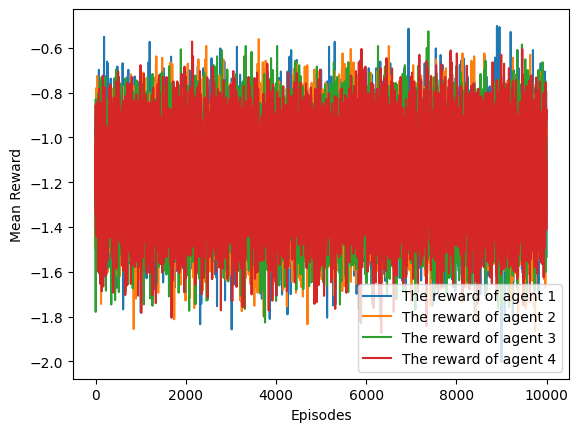

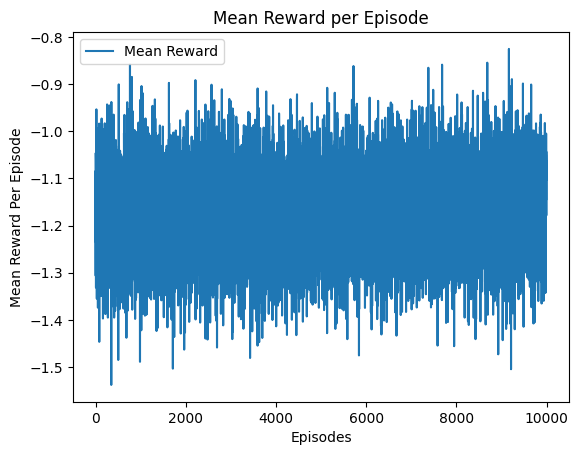

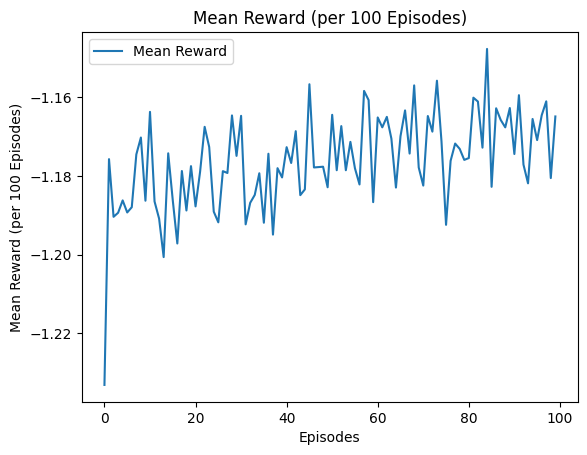

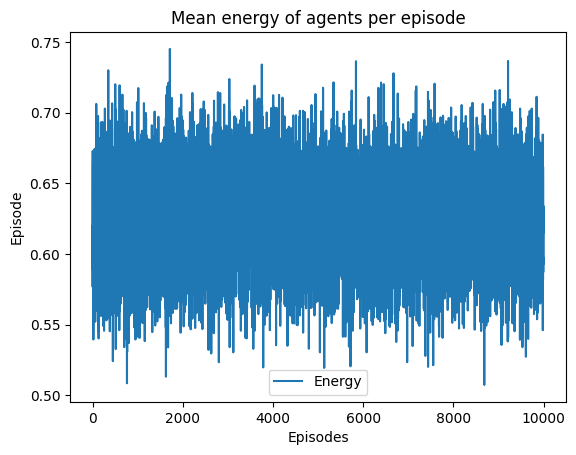

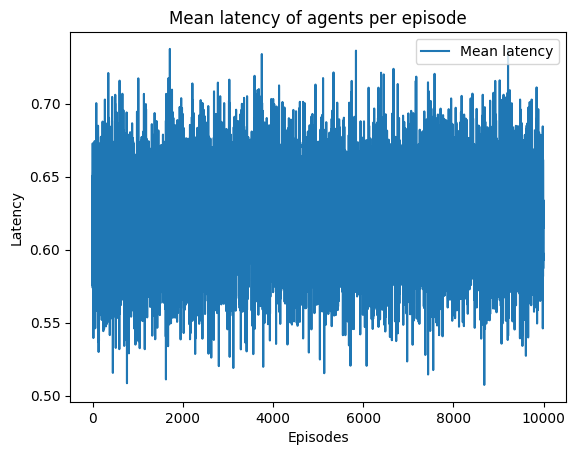

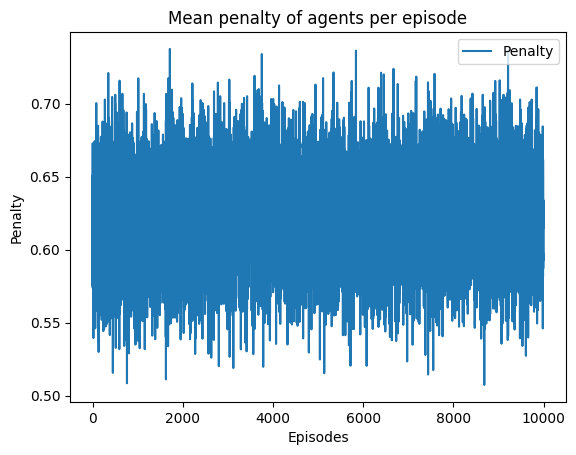

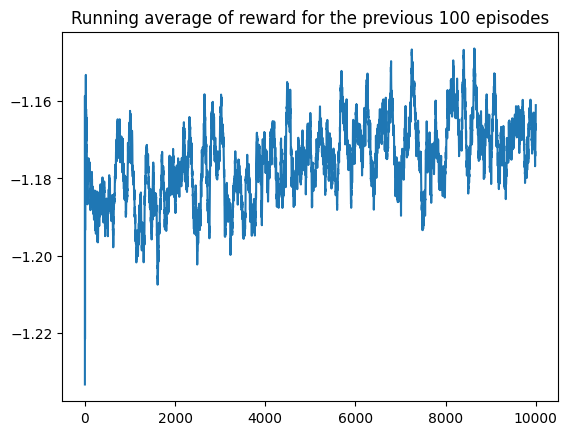

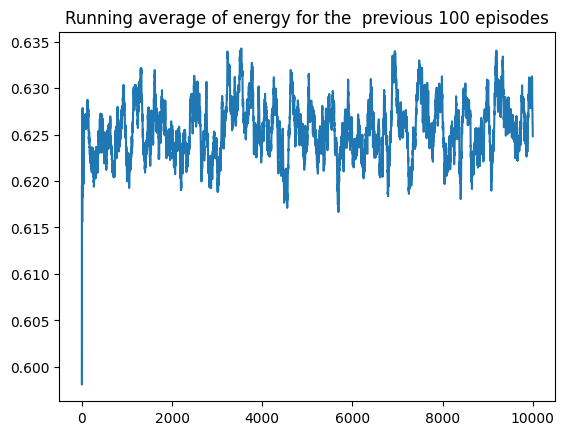

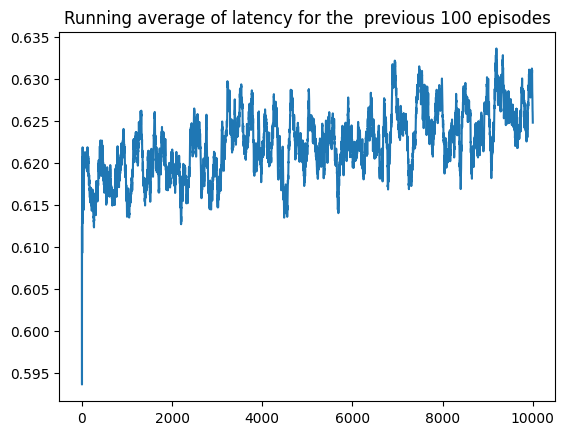

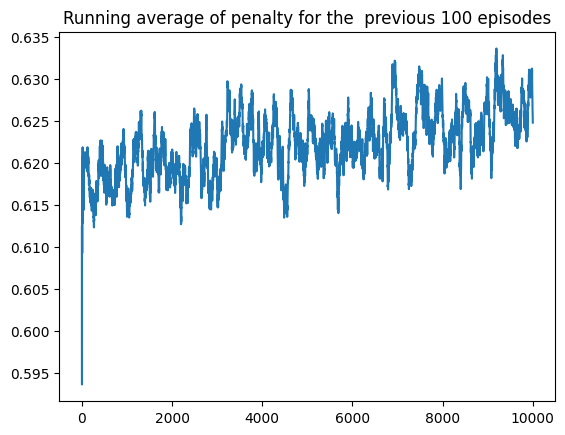

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import torch


from google.colab import drive
drive.mount('/content/drive')
if __name__ == '__main__':
    max_reward = -500
    batch_size = 100
    max_episode = 10000
    buffer_size = 50000
    INITIAL_EPSILON = 0.2 #1
    FINAL_EPSILON = 0.0001 #0.001
    load_checkpoint = False

    seed=11
    torch.manual_seed(seed)
    np.random.seed(seed)

    # To change
    gamma=0.99  # 0.95
    lr= 0.1 #0.001#1e-3 #0.001
    beta_weight_factor = 0.2
    num_of_agents= 4 # the number of the local devices = the maximal number of devices per BS
    AggPer = 100 # aggregate every 1000 episodes

    SIM_TIME = 20
    # power consumption
    D_DEVICE = 600 # cycles/bit (fd)
    D_EDGE = 500 # cycles/bit (Fs)

    Pd = 6e-7 #  W per CPU cycles
    Pe = 1e-8
    #-----------------------

    Fd = 500e6 # MHz (Dd) computation capacity
    Fe = 4e9 # GHz (Ds) computation capacity (greater)


    min_dis = 0.01 #km
    max_dis = 1. #km
    maxM = 8

    max_p = 28. #dBm
    min_p = 5
    max_p_watt=1e-3*pow(10,3.8)

    location= (0,0)
    device_location = (1 ,1)
    max_l = 10
    action_num = 10

    state_num = max_l * 9 + 3   # TODO : from device


    i_cell = 0
    j_cell = 0
    users_list = [] # TODO: maybe add a function that adds the device to the bs users_list

    Agents_list=[]
    Devices_list = []
    reward_lists_of_list=[]
    mean_reward_lists_of_list=[]


    bs = BS( i_cell, j_cell, users_list, min_dis, max_dis , maxM , location , D_EDGE , Pe, Fe , SIM_TIME )

    '''  (self,gamma, lr, n_actions, state_size,
                 buffer_size, batch_size, INITIAL_EPSILON, FINAL_EPSILON,max_episode,
                 replace=1000,chkpt_dir='tmp/dqn') '''

    global_agent = DQNAgent( gamma=gamma, lr=lr, n_actions=action_num, state_size=state_num,
                 buffer_size=buffer_size,batch_size=batch_size, INITIAL_EPSILON= INITIAL_EPSILON, FINAL_EPSILON= FINAL_EPSILON,max_episode=max_episode,
                 replace=1000)



    #device = Device( D_DEVICE, Pd , Fd, initial_battery_percentage ,  SIM_TIME,  agent, bs , min_dis, max_dis , device_location , max_p)


    for n in range(num_of_agents): # add the agents to the lists
        Agents_list.append(DQNAgent( gamma=gamma, lr=lr, n_actions=action_num, state_size=state_num,
                 buffer_size=buffer_size,batch_size=batch_size, INITIAL_EPSILON= INITIAL_EPSILON, FINAL_EPSILON=FINAL_EPSILON,max_episode=max_episode,
                 replace=1000))
        Devices_list.append( Device( D_DEVICE, Pd , Fd,  SIM_TIME, bs , min_dis, max_dis , device_location , max_p))

        reward_lists_of_list.append([])  # initialize the list of rewards
        mean_reward_lists_of_list.append([]) # initialize the list of mean rewards

    #print(' agents' , Agents_list)
    #print('Devices_list ' , Devices_list)
    #print('reward_lists_of_list ' , reward_lists_of_list)
    #print('mean_reward_lists_of_list ' , mean_reward_lists_of_list)
    interval = 100


    reward_hist = list()

    a=np.zeros(100).astype(np.int64)
    p=np.zeros(100)
    agent_rewards=np.zeros((num_of_agents,max_episode))
    agent_energy=np.zeros((num_of_agents,max_episode))
    agent_latency=np.zeros((num_of_agents,max_episode))
    agent_penalty=np.zeros((num_of_agents,max_episode))



    all_reward=[]
    mean_reward=[]
    mean_energy = []
    mean_latency= []

    reward_episodes = [] #np.zeros(max_episode)
    energy_episodes = [] #np.zeros(max_episode)
    latency_episodes = [] #np.zeros(max_episode)
    penalty_episodes = [] #np.zeros(max_episode)

    st = time.time()
    for k in range(max_episode):
        reward_episode = [] # contains the reward of the episode
        energy_episode = [] # contains the energy of the episode
        latency_episode = [] # contains the latency of the episode
        penalty_episode = [] # contains the penalty of the episode

        s_actor = [] #np.zeros(num_of_agents)
        s_actor_next = [] #np.zeros(num_of_agents)
        #print('s_actor' , s_actor)

        for j in range(num_of_agents): # resetting all the devices at the beginning of every episode
            #print('insiiide j loop ')
            #print('j = ' , j)
            #s_actor [j], _ = Devices_list[j].reset()
            s , _ = Devices_list[j].reset()
            #print('s = ' , s)
            s_actor.insert(j , s)
            #print('s' , s)
            #s_actor[j] = s
            #print('s_actor[j] = ' , s_actor[j])

        for n in range(num_of_agents) : # for every agent, we will do the following
            #print(' agent ' , n)
            reward = np.full((num_of_agents, SIM_TIME) , np.nan) # contains the reward of the episode
            energy = np.full((num_of_agents, SIM_TIME) , np.nan) # contains the energy of the episode
            latency = np.full((num_of_agents, SIM_TIME) , np.nan) # contains the latency of the episode
            penalty = np.full((num_of_agents, SIM_TIME) , np.nan) # contains the penalty of the episode

            for i in range(int(SIM_TIME)-1):
                #print('sim_time ' , SIM_TIME )

                s_actor_agent = s_actor[n]
                agent = Agents_list[n]
                device = Devices_list[n]
                device.charge_battery(i) # charge the batttery if its the charging time


                if(device.tasks_waiting_queue): # if the tasks queue is not empty
                    task = device.tasks_waiting_queue[0]
                    a = agent.select_action(s_actor_agent,k) # returns the index of the taken action
                    p = float(device.get_power_set()[a]) # select the power level that corresponds to the action taken
                    #s_actor_next[n] , _,   reward[n] = device.step(p , i , task )
                    s_n , _,   r , en, la, pen  = device.step(p , i , task )
                    #s_actor_next[n] =  s_n
                    #print('s_n ' ,s_n)
                    s_actor_next.insert(n, s_n)

                    reward[n , i ] = r # add the reward of epoch e to agent n
                    energy[n , i ] = en # add the energy of epoch e to agent n
                    latency[n , i ] = la # add the latency of epoch e to agent n
                    penalty[n , i ] = pen # add the penalty of epoch e to agent n
                    #print( n,'i = ',  i , 'reward[n , i ] =' , reward[n , i ])

                    agent.store_transition(s_actor[n], a, reward[n,i ] ,s_actor_next[n])
                    s_actor[n] = s_actor_next[n]

                    #reward_lists_of_list[n].append(reward[n]) # at the end, reward_lists_of_list[n] returns the list of rewards of the nth agent for all the time of simulation SIM_TIME

                else: # if its empty, we update the state without calculations
                    # update queue
                    device.update_task_queue(i)

                    # update state
                    #s_actor[n] = np.hstack([device.channel_gain[i] , device.tasks_waiting_queue[i] , device.remaining_resources[i], device.battery_percentage[i] ])


                    task_queue_array = device.queue_to_float()
                    remaining_resources = device.remaining_resources[i]
                    battery_percentage = device.battery_percentage[i]
                    channel_gain = device.channel_gain[i]
                    #reward[n , i ] = 0


                    #task_queue_tensor = torch.tensor(task_queue , dtype=torch.float32)
                    #battery_level_tensor = torch.tensor([device.battery_percentage[i]] , dtype=torch.float32)
                    #resources_tensor = torch.tensor([device.remaining_resources[i]] , dtype=torch.float32)
                    #channel_gain_tensor = torch.tensor([device.channel_gain[i] ] , dtype=torch.float32)

                    # concatenate tensors
                    #state_tensor = torch.cat([task_queue_tensor.view(-1), battery_level_tensor, resources_tensor, channel_gain_tensor])
                    state_array = np.concatenate(([battery_percentage, remaining_resources, channel_gain], task_queue_array.flatten()))
                    # convert concatenated tensor to list
                    #state_list = state_tensor#state_tensor.tolist()




                    s_actor[n] = state_array
            #print('reward[n] ' , reward[n] )
            #print('reward[n,:]' , reward[n, :])
            agent_rewards[n, k] = np.nanmean(reward[n]) # calculate the mean of reward for episode k and add it to the list of rewars of agents
            agent_energy[n, k] = np.nanmean(energy[n]) # calculate the mean of energy for episode k and add it to the list of rewars of agents
            agent_latency[n, k] = np.nanmean(latency[n]) # calculate the mean of latency for episode k and add it to the list of rewars of agents
            agent_penalty[n, k] = np.nanmean(penalty[n]) # calculate the mean of penalty for episode k and add it to the list of rewars of agents

            #print(' agent_rewards[n, k] n= ', n , 'k = ', k , 'agent_rewards[n, k] = ' , agent_rewards[n, k])

            # learning
            agent.learn()
            #reward_episode[n].append(np.mean(reward_lists_of_list[n])) # at the end, reward_episode[n] wil return the list of rewards of the nth agent for all the episodes


            #reward_episode.insert(n , np.mean(reward_lists_of_list[n]) )

        #reward_episodes[k] = np.mean([reward_lists_of_list[n][k] for n in range(num_of_agents)]) # the mean reward of episode K (of all the agents)


        #reward_episodes.insert( k , np.mean([reward_lists_of_list[n][k] for n in range(num_of_agents)]) )


        reward_episodes.append(agent_rewards[:, k].mean())
        energy_episodes.append(agent_energy[:, k].mean())
        latency_episodes.append(agent_latency[:, k].mean())
        penalty_episodes.append(agent_penalty[:, k].mean())


        # check if aggregation time (new episode)

        if k % AggPer == 0:
            global_dict = global_agent.q_eval.state_dict()
            for kd in global_dict.keys():
                global_dict[kd] = torch.stack([Agents_list[n].q_eval.state_dict()[kd] for n in range(num_of_agents)], 0).mean(0) # transferring the mean of weights of the agents to the global agent
            global_agent.q_eval.load_state_dict(global_dict)
            for n in range(num_of_agents): # the global agent sends back the aggregated weughts to the local agents
                Agents_list[n].q_eval.load_state_dict(global_agent.q_eval.state_dict())


        if k % interval == 0:
            reward_ = np.mean(reward_episodes[-interval:])
            energy_ = np.mean(energy_episodes[-interval:])
            latency_ = np.mean(latency_episodes[-interval:])
            penalty_ = np.mean(penalty_episodes[-interval:])
            #print("reward_ " , reward_)
            mean_reward.append(reward_)
            if reward_ > max_reward:
                global_agent.save_models('/content/drive/MyDrive/models/DQN_Fed_final_'+str(beta_weight_factor)+'_'+str(num_of_agents)+'_agents_AggPer_'+str(AggPer)+'.pth')
                # global_agent.save_models('/content/drive/MyDrive/models/DQN_distributed_'+str(beta_weight_factor)+'_'+str(num_of_agents)+'_agents.pth')

                max_reward = reward_
            print("Episode(train):%d  FDQN: %.3f  Time cost: %.2fs" %(k, reward_, time.time()-st))
            st = time.time()

    print("agent_rewards" , agent_rewards)

    #x = np.linspace(0,100, 100)

    agent_1_reward = agent_rewards[0,:]
    agent_2_reward = agent_rewards[1,:]
    agent_3_reward = agent_rewards[2,:]
    agent_4_reward = agent_rewards[3,:]
    # agent_5_reward = agent_rewards[4,:]
    # agent_6_reward = agent_rewards[5,:]
    # agent_7_reward = agent_rewards[6,:]
    # agent_8_reward = agent_rewards[7,:]


     # energy of agents
    agent_1_energy = agent_energy[0,:]
    agent_2_energy = agent_energy[1,:]
    agent_3_energy = agent_energy[2,:]
    agent_4_energy = agent_energy[3,:]
    # agent_5_energy = agent_energy[4,:]
    # agent_6_energy = agent_energy[5,:]
    # agent_7_energy = agent_energy[6,:]
    # agent_8_energy = agent_energy[7,:]

    # latency of agents
    agent_1_latency = agent_latency[0,:]
    agent_2_latency = agent_latency[1,:]
    agent_3_latency = agent_latency[2,:]
    agent_4_latency = agent_latency[3,:]
    # agent_5_latency = agent_latency[4,:]
    # agent_6_latency = agent_latency[5,:]
    # agent_7_latency = agent_latency[6,:]
    # agent_8_latency = agent_latency[7,:]

    # penalty of agents
    agent_1_penalty = agent_penalty[0,:]
    agent_2_penalty = agent_penalty[1,:]
    agent_3_penalty = agent_penalty[2,:]
    agent_4_penalty = agent_penalty[3,:]
    # agent_5_penalty = agent_penalty[4,:]
    # agent_6_penalty = agent_penalty[5,:]
    # agent_7_penalty = agent_penalty[6,:]
    # agent_8_penalty = agent_penalty[7,:]


    # Create a new figure and axis object
    fig, ax = plt.subplots()

    # Plot each array on the same axis object
    ax.plot( agent_1_reward, label='The reward of agent 1')
    ax.plot( agent_2_reward, label='The reward of agent 2')
    ax.plot( agent_3_reward, label='The reward of agent 3')
    ax.plot( agent_4_reward, label='The reward of agent 4')
    # ax.plot( agent_5_reward, label='The reward of agent 5')
    # ax.plot( agent_6_reward, label='The reward of agent 6')
    # ax.plot( agent_7_reward, label='The reward of agent 7')
    # ax.plot( agent_8_reward, label='The reward of agent 8')
    #ax.plot( reward_episodes, label='The mean reward per episode')
    # Add a legend to the plot
    ax.legend()
    ax.set_xlabel('Episodes')

    ax.set_ylabel('Mean Reward')


    # Show the plot
    plt.show()


    fig2, ax2 = plt.subplots()
    ax2.plot( reward_episodes, label='Mean Reward')
    ax2.legend()
    # Set the label of the y-axis
    ax2.set_xlabel('Episodes')

    ax2.set_ylabel('Mean Reward Per Episode')
    plt.title('Mean Reward per Episode')


    # Show the plot
    plt.show()


    fig3, ax3 = plt.subplots()

    ax3.plot( mean_reward, label='Mean Reward')
    #ax.plot( reward_episodes, label='The mean reward per episode')
    # Add a legend to the plot
    ax3.legend()
    ax3.set_xlabel('Episodes')

    ax3.set_ylabel('Mean Reward (per 100 Episodes)')
    plt.title('Mean Reward (per 100 Episodes)')

    plt.show()
    # plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Mean_Reward_Per_100_Episodes_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')

    # the mean reward of the the last (interval_number) episodes


    fig4, ax4 = plt.subplots()

    ax4.plot( energy_episodes, label='Energy')
    ax4.legend()
    ax4.set_xlabel('Episodes')

    ax4.set_ylabel('Episode')
    plt.title('Mean energy of agents per episode')

    plt.show()
    # plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Mean_Energy_Per_Episode_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')



    fig5, ax5 = plt.subplots()

    ax5.plot( latency_episodes, label='Mean latency')
    ax5.legend()
    ax5.set_xlabel('Episodes')

    ax5.set_ylabel('Latency')
    plt.title('Mean latency of agents per episode')

    plt.show()
    # plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Mean_Latency_Per_Episode_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')



    fig6, ax6 = plt.subplots()

    ax6.plot( latency_episodes, label='Penalty')
    ax6.legend()
    ax6.set_xlabel('Episodes')

    ax6.set_ylabel('Penalty')
    plt.title('Mean penalty of agents per episode')

    plt.show()
    # plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Mean_Penalty_Per_Episode_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')



    #fname = 'FDQN_' + 'average_reward' + '_' + str(max_episode) + 'episodes'
    #figure_file = 'output/plots/' + fname + '.png' # TODO
    x = [i+1 for i in range(max_episode)]
    y = [i+1 for i in range(max_episode)]
    z = [i+1 for i in range(max_episode)]
    t = [i+1 for i in range(max_episode)]

    running_avg = np.zeros(max_episode)
    running_energy = np.zeros(max_episode)
    running_latency = np.zeros(max_episode)
    running_penalty = np.zeros(max_episode)
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(reward_episodes[max(0, i-100):(i+1)])
        running_energy[i] = np.mean(energy_episodes[max(0, i-100):(i+1)])
        running_latency[i] = np.mean(latency_episodes[max(0, i-100):(i+1)])
        running_penalty[i] = np.mean(penalty_episodes[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of reward for the previous 100 episodes')
    plt.show()
    # plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Running_Average_Reward_100_Episodes_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')


    plt.plot(y, running_energy)
    plt.title('Running average of energy for the  previous 100 episodes')
    plt.show()
    # plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Running_Average_Energy_100_Episodes_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')


    plt.plot(z, running_latency)
    plt.title('Running average of latency for the  previous 100 episodes')
    plt.show()
    # plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Running_Average_Latency_100_Episodes_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')


    plt.plot(t, running_latency)
    plt.title('Running average of penalty for the  previous 100 episodes')
    plt.show()
    plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Running_Average_Penalty_100_Episodes_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')


    #global_agent.save_models('/content/drive/MyDrive/models/DQN_Fed_final_'+str(beta_weight_factor)+'_'+str(num_of_agents)+'_agents_AggPer_'+str(AggPer)+'.pth')


    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_all_agents_rewards_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(agent_rewards))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_all_agents_energy_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(agent_energy))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_all_agents_latency_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(agent_latency))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_all_agents_penalty_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(agent_penalty))


    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_mean_reward_episodes'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(reward_episodes))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_mean_reward_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(mean_reward))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_runnning_average_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(running_avg))


    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_mean_energy_episodes_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(energy_episodes))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_mean_energy_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(mean_energy))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_runnning_energy_average_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(running_energy))

    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_mean_latency_episodes_'+str(num_of_agents)+'__AggPer_'+str(AggPer)+'.npy',np.array(latency_episodes))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_mean_latency_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(mean_latency))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_runnning_latency_average_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(running_latency))

    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_all_agents_rewards_'+str(num_of_agents)+'.npy',np.array(agent_rewards))
    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_all_agents_energy_'+str(num_of_agents)+'.npy',np.array(agent_energy))
    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_all_agents_latency_'+str(num_of_agents)+'.npy',np.array(agent_latency))
    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_all_agents_penalty_'+str(num_of_agents)+'.npy',np.array(agent_penalty))


    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_mean_reward_episodes'+str(num_of_agents)+'.npy',np.array(reward_episodes))
    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_mean_reward_'+str(num_of_agents)+'.npy',np.array(mean_reward))
    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_runnning_average_'+str(num_of_agents)+'.npy',np.array(running_avg))

    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_mean_energy_episodes_'+str(num_of_agents)+'.npy',np.array(energy_episodes))
    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_mean_energy_'+str(num_of_agents)+'.npy',np.array(mean_energy))
    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_runnning_energy_average_'+str(num_of_agents)+'.npy',np.array(running_energy))

    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_mean_latency_episodes_'+str(num_of_agents)+'.npy',np.array(latency_episodes))
    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_mean_latency_'+str(num_of_agents)+'.npy',np.array(mean_latency))
    # np.save('/content/drive/MyDrive/npfiles/distributed_DQN_'+str(beta_weight_factor)+'_runnning_latency_average_'+str(num_of_agents)+'.npy',np.array(running_latency))







In [ ]:
    agent_1_reward = agent_rewards[0,:]
    agent_2_reward = agent_rewards[1,:]
    # agent_3_reward = agent_rewards[2,:]
    # agent_4_reward = agent_rewards[3,:]
    # agent_5_reward = agent_rewards[4,:]
    # agent_6_reward = agent_rewards[5,:]
    # agent_7_reward = agent_rewards[6,:]
    # agent_8_reward = agent_rewards[7,:]


     # energy of agents
    agent_1_energy = agent_energy[0,:]
    agent_2_energy = agent_energy[1,:]
    # agent_3_energy = agent_energy[2,:]
    # agent_4_energy = agent_energy[3,:]
    # agent_5_energy = agent_energy[4,:]
    # agent_6_energy = agent_energy[5,:]
    # agent_7_energy = agent_energy[6,:]
    # agent_8_energy = agent_energy[7,:]

    # latency of agents
    agent_1_latency = agent_latency[0,:]
    agent_2_latency = agent_latency[1,:]
    # agent_3_latency = agent_latency[2,:]
    # agent_4_latency = agent_latency[3,:]
    # agent_5_latency = agent_latency[4,:]
    # agent_6_latency = agent_latency[5,:]
    # agent_7_latency = agent_latency[6,:]
    # agent_8_latency = agent_latency[7,:]

    # penalty of agents
    agent_1_penalty = agent_penalty[0,:]
    agent_2_penalty = agent_penalty[1,:]
    # agent_3_penalty = agent_penalty[2,:]
    # agent_4_penalty = agent_penalty[3,:]
    # agent_5_penalty = agent_penalty[4,:]
    # agent_6_penalty = agent_penalty[5,:]
    # agent_7_penalty = agent_penalty[6,:]
    # agent_8_penalty = agent_penalty[7,:]


    # Create a new figure and axis object
    fig, ax = plt.subplots()

    # Plot each array on the same axis object
    ax.plot( agent_1_reward, label='The reward of agent 1')
    ax.plot( agent_2_reward, label='The reward of agent 2')
    # ax.plot( agent_3_reward, label='The reward of agent 3')
    # ax.plot( agent_4_reward, label='The reward of agent 4')
    # ax.plot( agent_5_reward, label='The reward of agent 5')
    # ax.plot( agent_6_reward, label='The reward of agent 6')
    # ax.plot( agent_7_reward, label='The reward of agent 7')
    # ax.plot( agent_8_reward, label='The reward of agent 8')
    #ax.plot( reward_episodes, label='The mean reward per episode')
    # Add a legend to the plot
    ax.legend()
    ax.set_xlabel('Episodes')

    ax.set_ylabel('Mean Reward')


    # Show the plot
    plt.show()


    fig2, ax2 = plt.subplots()
    ax2.plot( reward_episodes, label='Mean Reward')
    ax2.legend()
    # Set the label of the y-axis
    ax2.set_xlabel('Episodes')

    ax2.set_ylabel('Mean Reward Per Episode')
    plt.title('Mean Reward per Episode')


    # Show the plot
    plt.show()


    fig3, ax3 = plt.subplots()

    ax3.plot( mean_reward, label='Mean Reward')
    #ax.plot( reward_episodes, label='The mean reward per episode')
    # Add a legend to the plot
    ax3.legend()
    ax3.set_xlabel('Episodes')

    ax3.set_ylabel('Mean Reward (per 100 Episodes)')
    plt.title('Mean Reward (per 100 Episodes)')

    plt.show()
    plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Mean_Reward_Per_100_Episodes_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')

    # the mean reward of the the last (interval_number) episodes


    fig4, ax4 = plt.subplots()

    ax4.plot( energy_episodes, label='Energy')
    ax4.legend()
    ax4.set_xlabel('Episodes')

    ax4.set_ylabel('Episode')
    plt.title('Mean energy of agents per episode')

    plt.show()
    plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Mean_Energy_Per_Episode_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')



    fig5, ax5 = plt.subplots()

    ax5.plot( latency_episodes, label='Mean latency')
    ax5.legend()
    ax5.set_xlabel('Episodes')

    ax5.set_ylabel('Latency')
    plt.title('Mean latency of agents per episode')

    plt.show()
    plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Mean_LAtency_Per_Episode_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')



    fig6, ax6 = plt.subplots()

    ax6.plot( latency_episodes, label='Penalty')
    ax6.legend()
    ax6.set_xlabel('Episodes')

    ax6.set_ylabel('Penalty')
    plt.title('Mean penalty of agents per episode')

    plt.show()
    plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Mean_Penalty_Per_Episode_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')



    #fname = 'FDQN_' + 'average_reward' + '_' + str(max_episode) + 'episodes'
    #figure_file = 'output/plots/' + fname + '.png' # TODO
    x = [i+1 for i in range(max_episode)]
    y = [i+1 for i in range(max_episode)]
    z = [i+1 for i in range(max_episode)]
    t = [i+1 for i in range(max_episode)]

    running_avg = np.zeros(max_episode)
    running_energy = np.zeros(max_episode)
    running_latency = np.zeros(max_episode)
    running_penalty = np.zeros(max_episode)
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(reward_episodes[max(0, i-100):(i+1)])
        running_energy[i] = np.mean(energy_episodes[max(0, i-100):(i+1)])
        running_latency[i] = np.mean(latency_episodes[max(0, i-100):(i+1)])
        running_penalty[i] = np.mean(penalty_episodes[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of reward for the previous 100 episodes')
    plt.show()
    plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Running_Average_Reward_100_Episodes_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')


    plt.plot(y, running_energy)
    plt.title('Running average of energy for the  previous 100 episodes')
    plt.show()
    plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Running_Average_Energy_100_Episodes_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')


    plt.plot(z, running_latency)
    plt.title('Running average of latency for the  previous 100 episodes')
    plt.show()
    plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Running_Average_Latency_100_Episodes_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')


    plt.plot(t, running_latency)
    plt.title('Running average of penalty for the  previous 100 episodes')
    plt.show()
    plt.savefig('/content/drive/MyDrive/models/figs/FDQN_Running_Average_Penalty_100_Episodes_'+str(num_of_agents)+'_agents_beta_'+str(beta_weight_factor)+'_AggPer_'+str(AggPer)+'.png')


    #global_agent.save_models('/content/drive/MyDrive/models/DQN_Fed_final_'+str(beta_weight_factor)+'_'+str(num_of_agents)+'_agents_AggPer_'+str(AggPer)+'.pth')


    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_all_agents_rewards_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(agent_rewards))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_all_agents_energy_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(agent_energy))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_all_agents_latency_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(agent_latency))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_all_agents_penalty_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(agent_penalty))


    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_mean_reward_episodes'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(reward_episodes))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_mean_reward_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(mean_reward))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_runnning_average_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(running_avg))

    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_mean_energy_episodes_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(energy_episodes))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_mean_energy_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(mean_energy))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_runnning_energy_average_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(running_energy))

    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_mean_latency_episodes_'+str(num_of_agents)+'__AggPer_'+str(AggPer)+'.npy',np.array(latency_episodes))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_mean_latency_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(mean_latency))
    np.save('/content/drive/MyDrive/npfiles/federated_DQN_'+str(beta_weight_factor)+'_runnning_latency_average_'+str(num_of_agents)+'_AggPer_'+str(AggPer)+'.npy',np.array(running_latency))






NameError: ignored